# Imports

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


from src import ROCWClustering, RankOrderClustering, ApproximateRankOrderClustering, ChineseWhispers

# Define plotting tools

In [2]:
# def plot_clusters(data, algorithm, name):
#     start_time = time.time()
#     labels = algorithm.fit_predict(data)
#     end_time = time.time()
#     unique = set(labels)

#     colors = [[plt.cm.Spectral(each)]
#               for each in np.linspace(0, 1, len(unique))]
#     plt.figure(figsize=(12, 12))
#     for label, color in zip(unique, colors):
#         args = np.where(labels == label)[0]
#         points = data[args]
#         plt.scatter(points[:, 0], points[:, 1], c=color, alpha=0.25, s=80, linewidths=0)

#     frame = plt.gca()
#     frame.axes.get_xaxis().set_visible(False)
#     frame.axes.get_yaxis().set_visible(False)
#     plt.title('Clusters found by {}'.format(name), fontsize=24)
#     plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    
def plot_clusters(ax, points, labels, title, duration):
    ax.scatter(points[:, 0], points[:, 1], c=labels, alpha=0.25, s=80, linewidths=0)
    ax.set_title(title)
    ax.text(0.02, 0.95,
            'Clustering took {:.2f} s'.format(duration),
            fontsize=7,
            transform=ax.transAxes)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

# Make some datasets

In [3]:
data = np.load('data.npy')
my_dataset = data, None

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples,
                                      factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

dsets = [noisy_moons, blobs, aniso, varied, my_dataset, no_structure]

# Define algorithms

In [4]:
ro = RankOrderClustering(k=10)
app_ro = ApproximateRankOrderClustering(metric='euclidean', k=20)
cw = ChineseWhispers(metric='euclidean', n_iteration=10)
ro_cw = ROCWClustering(metric='euclidean', k=20, n_iteration=10)

algorithms = [app_ro, cw, ro_cw]

# Compare algorithms on datasets

dataset: 0, alg: ApproximateRankOrderClustering
dataset: 0, alg: ChineseWhispers
dataset: 0, alg: ROCWClustering
dataset: 1, alg: ApproximateRankOrderClustering
dataset: 1, alg: ChineseWhispers
dataset: 1, alg: ROCWClustering
dataset: 2, alg: ApproximateRankOrderClustering
dataset: 2, alg: ChineseWhispers
dataset: 2, alg: ROCWClustering
dataset: 3, alg: ApproximateRankOrderClustering
dataset: 3, alg: ChineseWhispers
dataset: 3, alg: ROCWClustering
dataset: 4, alg: ApproximateRankOrderClustering
dataset: 4, alg: ChineseWhispers
dataset: 4, alg: ROCWClustering
dataset: 5, alg: ApproximateRankOrderClustering
dataset: 5, alg: ChineseWhispers
dataset: 5, alg: ROCWClustering


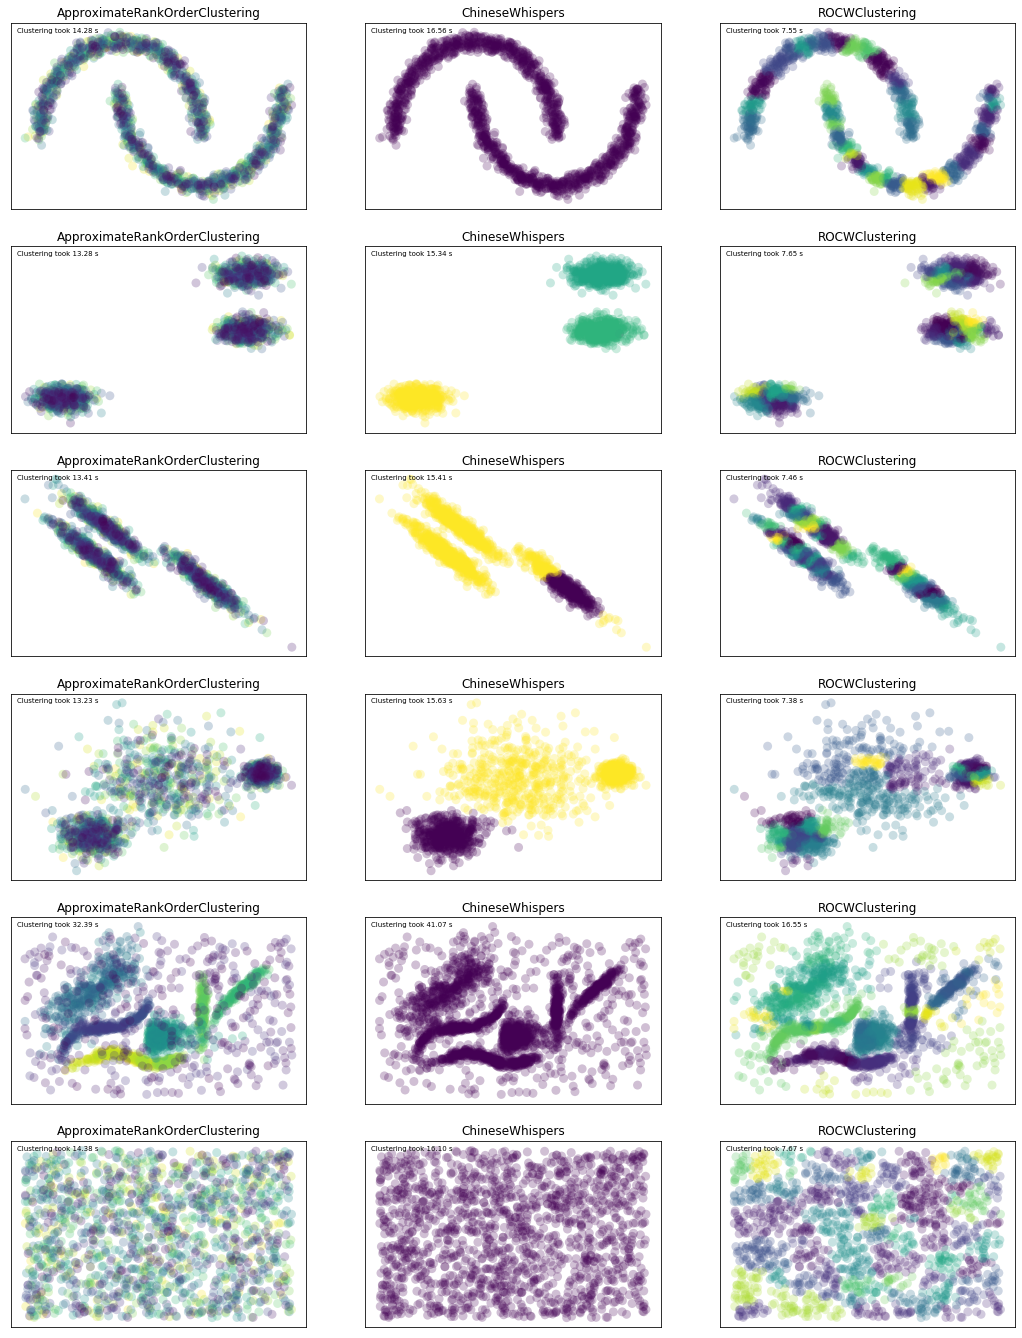

In [5]:
fig_factor = 4
n_algs = len(algorithms)
n_dets = len(dsets)
fig, axes = plt.subplots(ncols=n_algs, nrows=n_dets,
                         figsize=(int((fig_factor + 2) * n_algs),
                                  int(fig_factor * n_dets)))

for i, (points, labels) in enumerate(dsets):
    points = StandardScaler().fit_transform(points)
    for j, alg in enumerate(algorithms):
        title = type(alg).__name__
        print('dataset: {}, alg: {}'.format(i, title))
        
        start_time = time.time()
        labels = alg.fit_predict(points)
        end_time = time.time()
        duration = end_time - start_time
        
        ax = axes[i, j]
        plot_clusters(ax, points, labels, title, duration)

End of file.